In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import tensorflow as tf
import matplotlib.image as mpimg
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras

In [2]:
directory = 'animals'
train_df =  tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=435,
    validation_split=.3,
    subset='training',
    interpolation="bilinear"
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=435,
    validation_split=.3,
    subset='validation',
    interpolation="bilinear"
)

Found 25000 files belonging to 2 classes.
Using 17500 files for training.
Found 25000 files belonging to 2 classes.
Using 7500 files for validation.


In [3]:
train_df.class_names

['cats', 'dogs']

In [4]:
test_directory = '/Users/jasminesamuel/Desktop/test-1'

In [5]:
test = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=435,
    interpolation="bilinear"
)

Found 12500 files belonging to 1 classes.


In [6]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
]
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001,
                                                 beta_1=0.9,
                                                 beta_2=0.999)

sgd_optimizer = keras.optimizers.SGD(lr=.02, momentum=0.9, decay=0.01)

In [7]:
model1 = keras.models.Sequential([
    keras.layers.Conv2D(filters= 32, kernel_size=(3,3),strides=1, activation='relu', padding='same',
                       input_shape=[128,128,3]),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(124, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(500, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.01))
    
    
])

In [8]:
model1.compile(loss='binary_crossentropy', optimizer= sgd_optimizer, metrics=['accuracy'])

# fit model
time_start = datetime.now()
history1 = model1.fit(train_df, epochs=15, validation_data=val_ds,batch_size=32, callbacks=my_callbacks)
time_end = datetime.now()
time_elapsed = time_end - time_start

print('Time elapsed')
print(time_elapsed)
print("Fit model on training data")
history1.history

Epoch 1/15
547/547 [==============================] - 705s 1s/step - loss: 5.0501 - accuracy: 0.6806 - val_loss: 2.8857 - val_accuracy: 0.7383
Epoch 2/15
547/547 [==============================] - 710s 1s/step - loss: 2.2953 - accuracy: 0.7751 - val_loss: 2.0232 - val_accuracy: 0.7083
Epoch 3/15
547/547 [==============================] - 655s 1s/step - loss: 1.6606 - accuracy: 0.8166 - val_loss: 1.6355 - val_accuracy: 0.7271
Epoch 4/15
547/547 [==============================] - 651s 1s/step - loss: 1.3430 - accuracy: 0.8465 - val_loss: 1.3485 - val_accuracy: 0.7881
Epoch 5/15
547/547 [==============================] - 663s 1s/step - loss: 1.1463 - accuracy: 0.8714 - val_loss: 1.2217 - val_accuracy: 0.7900
Epoch 6/15
547/547 [==============================] - 651s 1s/step - loss: 1.0114 - accuracy: 0.8869 - val_loss: 1.1262 - val_accuracy: 0.7947
Epoch 7/15
547/547 [==============================] - 653s 1s/step - loss: 0.9146 - accuracy: 0.8989 - val_loss: 1.0795 - val_accuracy: 0.7823

{'loss': [5.05006217956543,
  2.2952752113342285,
  1.6605913639068604,
  1.343035340309143,
  1.1462757587432861,
  1.0114262104034424,
  0.9145678877830505,
  0.8364250659942627,
  0.7770538330078125,
  0.7246623635292053,
  0.6816500425338745,
  0.6494920253753662,
  0.6189975738525391,
  0.5946130156517029,
  0.5737034678459167],
 'accuracy': [0.680571436882019,
  0.7750856876373291,
  0.8165714144706726,
  0.8465142846107483,
  0.8714285492897034,
  0.8869143128395081,
  0.8988571166992188,
  0.9149714112281799,
  0.92182856798172,
  0.9334285855293274,
  0.9399999976158142,
  0.9422285556793213,
  0.9499428868293762,
  0.9522857069969177,
  0.954628586769104],
 'val_loss': [2.885737180709839,
  2.023183822631836,
  1.635475993156433,
  1.3485240936279297,
  1.2217321395874023,
  1.1262226104736328,
  1.0795105695724487,
  0.994401216506958,
  0.9677214026451111,
  0.9149035811424255,
  0.8864067792892456,
  0.870059072971344,
  0.8564140200614929,
  0.8226652145385742,
  0.806944

In [9]:
print("Prediction on test data")
predictions1 = model1.predict(test)
predictions1

Prediction on test data


array([[0.0125362 ],
       [0.05318043],
       [0.5549978 ],
       ...,
       [0.3694193 ],
       [0.48061836],
       [0.9788165 ]], dtype=float32)

In [10]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters= 16, kernel_size=3,strides=1, activation='relu', padding='same',
                       input_shape=[128,128,3]),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.01),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(525, activation='relu',kernel_regularizer=keras.regularizers.l2(0.02)),
    keras.layers.Dense(1, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.02))
    
    
])

In [11]:
model2.compile(loss="binary_crossentropy", optimizer=sgd_optimizer, metrics=["accuracy"])

In [12]:
history2 = model2.fit(train_df, epochs=15, validation_data=val_ds,batch_size=32, callbacks=my_callbacks)
time_end = datetime.now()
time_elapsed = time_end - time_start

print('Time elapsed')
print(time_elapsed)
print("Fit model on training data")
history2.history

Epoch 1/15
547/547 [==============================] - 566s 1s/step - loss: 17.8840 - accuracy: 0.6029 - val_loss: 16.9999 - val_accuracy: 0.6317
Epoch 2/15
547/547 [==============================] - 557s 1s/step - loss: 16.1778 - accuracy: 0.6830 - val_loss: 15.4375 - val_accuracy: 0.7049
Epoch 3/15
547/547 [==============================] - 561s 1s/step - loss: 14.7398 - accuracy: 0.7286 - val_loss: 14.1825 - val_accuracy: 0.6608
Epoch 4/15
547/547 [==============================] - 571s 1s/step - loss: 13.5068 - accuracy: 0.7562 - val_loss: 13.0789 - val_accuracy: 0.6489
Epoch 5/15
547/547 [==============================] - 572s 1s/step - loss: 12.4382 - accuracy: 0.7734 - val_loss: 11.9765 - val_accuracy: 0.7692
Epoch 6/15
547/547 [==============================] - 570s 1s/step - loss: 11.5044 - accuracy: 0.7912 - val_loss: 11.1547 - val_accuracy: 0.7435
Epoch 7/15
547/547 [==============================] - 570s 1s/step - loss: 10.6832 - accuracy: 0.8043 - val_loss: 10.3421 - val_ac

{'loss': [17.88401985168457,
  16.177804946899414,
  14.739846229553223,
  13.5067720413208,
  12.438214302062988,
  11.504375457763672,
  10.683182716369629,
  9.95340347290039,
  9.30482292175293,
  8.72742748260498,
  8.205578804016113,
  7.731285572052002,
  7.30284309387207,
  6.917820453643799,
  6.557654857635498],
 'accuracy': [0.6028571724891663,
  0.6829714179039001,
  0.7285714149475098,
  0.7562285661697388,
  0.7734285593032837,
  0.7911999821662903,
  0.8042857050895691,
  0.8185142874717712,
  0.8256571292877197,
  0.8315428495407104,
  0.8374285697937012,
  0.8456571698188782,
  0.848971426486969,
  0.8541714549064636,
  0.8600000143051147],
 'val_loss': [16.999853134155273,
  15.43750286102295,
  14.182469367980957,
  13.078941345214844,
  11.976461410522461,
  11.154729843139648,
  10.342116355895996,
  9.663337707519531,
  9.055197715759277,
  8.5064697265625,
  8.026325225830078,
  7.559018135070801,
  7.363685607910156,
  6.79112434387207,
  6.489024639129639],
 'v

In [13]:
print("Evaluate on test data")
predictions2 = model2.predict(test)
predictions2

Evaluate on test data


array([[0.68304574],
       [0.06257614],
       [0.0265061 ],
       ...,
       [0.1607689 ],
       [0.5228107 ],
       [0.9601995 ]], dtype=float32)

In [14]:
model3 = keras.models.Sequential([
    keras.layers.Conv2D(filters= 64, kernel_size=3,strides=1, activation='relu', padding='same',
                       input_shape=[128,128,3]),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128,3, activation='relu',padding='same'),
    keras.layers.Conv2D(128,3, activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256,3, activation='relu',padding='same'),
    keras.layers.Conv2D(256,3, activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model3.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=adam_optimizer,
              metrics=['accuracy'])

In [16]:
time_start = datetime.now()
history3 = model3.fit(train_df, epochs=5, validation_data=val_ds,batch_size=32, callbacks=my_callbacks)
time_end = datetime.now()
time_elapsed = time_end - time_start

print('Time elapsed')
print(time_elapsed)
print("Fit model on training data")
history3.history

Epoch 1/5
547/547 [==============================] - 3354s 6s/step - loss: 0.6545 - accuracy: 0.6470 - val_loss: 0.6132 - val_accuracy: 0.6652
Epoch 2/5
547/547 [==============================] - 5582s 10s/step - loss: 0.5106 - accuracy: 0.7517 - val_loss: 0.5270 - val_accuracy: 0.7357
Epoch 3/5
547/547 [==============================] - 3383s 6s/step - loss: 0.4276 - accuracy: 0.8050 - val_loss: 0.6236 - val_accuracy: 0.6769
Epoch 4/5
547/547 [==============================] - 3280s 6s/step - loss: 0.3743 - accuracy: 0.8363 - val_loss: 0.4307 - val_accuracy: 0.7991
Epoch 5/5
547/547 [==============================] - 3293s 6s/step - loss: 0.3234 - accuracy: 0.8610 - val_loss: 0.3685 - val_accuracy: 0.8333
Time elapsed
5:15:36.527536
Fit model on training data


{'loss': [0.6545300483703613,
  0.5106210112571716,
  0.42763569951057434,
  0.37433210015296936,
  0.3233620524406433],
 'accuracy': [0.6470285654067993,
  0.751714289188385,
  0.80497145652771,
  0.8363428711891174,
  0.8610285520553589],
 'val_loss': [0.6131600737571716,
  0.5269775986671448,
  0.6236370205879211,
  0.43072938919067383,
  0.36848410964012146],
 'val_accuracy': [0.6651999950408936,
  0.7357333302497864,
  0.6769333481788635,
  0.7990666627883911,
  0.8333333134651184],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001]}

In [84]:
print("Evaluate on test data")
predictions3 = model3.predict(test)
predictions3

Evaluate on test data


array([[0.13625988],
       [0.46567747],
       [0.7302501 ],
       ...,
       [0.95563364],
       [0.99239916],
       [0.15077016]], dtype=float32)

In [18]:
model4 = keras.models.Sequential([
    keras.layers.Conv2D(filters= 64, kernel_size=(3,3),strides=1, activation='relu', padding='same',
                       input_shape=[128,128,3]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(128,3, activation='relu',padding='same'),
    keras.layers.Conv2D(128,3, activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256,3, activation='relu',padding='same'),
    keras.layers.Conv2D(256,3, activation='relu',padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model4.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=adam_optimizer,
              metrics=['accuracy'])

In [20]:
# fit model
time_start = datetime.now()
history4 = model4.fit(train_df, epochs=30, validation_data=val_ds,batch_size=32, callbacks=my_callbacks)
time_end = datetime.now()
time_elapsed = time_end - time_start

print('Time elapsed')
print(time_elapsed)
print("Fit model on training data")
history4.history

Epoch 1/30
547/547 [==============================] - 3082s 6s/step - loss: 0.6918 - accuracy: 0.5796 - val_loss: 0.6639 - val_accuracy: 0.5909
Epoch 2/30
547/547 [==============================] - 3061s 6s/step - loss: 0.6474 - accuracy: 0.6262 - val_loss: 19.6610 - val_accuracy: 0.5105
Epoch 3/30
547/547 [==============================] - 3020s 6s/step - loss: 0.6027 - accuracy: 0.6695 - val_loss: 0.8344 - val_accuracy: 0.5421
Epoch 4/30
547/547 [==============================] - 2939s 5s/step - loss: 0.5843 - accuracy: 0.6861 - val_loss: 0.6411 - val_accuracy: 0.6324
Epoch 5/30
547/547 [==============================] - 2935s 5s/step - loss: 0.6153 - accuracy: 0.6588 - val_loss: 0.6738 - val_accuracy: 0.6444
Epoch 6/30
547/547 [==============================] - 2933s 5s/step - loss: 0.5790 - accuracy: 0.6991 - val_loss: 3.0616 - val_accuracy: 0.6615
Epoch 7/30
547/547 [==============================] - 2945s 5s/step - loss: 0.5653 - accuracy: 0.7078 - val_loss: 1.5871 - val_accuracy

{'loss': [0.69181889295578,
  0.6474006772041321,
  0.6027238965034485,
  0.5842838287353516,
  0.615260899066925,
  0.5789574980735779,
  0.5653097033500671],
 'accuracy': [0.5795999765396118,
  0.6262285709381104,
  0.6695428490638733,
  0.6860571503639221,
  0.6588000059127808,
  0.6990857124328613,
  0.7078285813331604],
 'val_loss': [0.6638781428337097,
  19.66098403930664,
  0.8343724608421326,
  0.6410884261131287,
  0.6737872958183289,
  3.0615665912628174,
  1.5870946645736694],
 'val_accuracy': [0.5909333229064941,
  0.510533332824707,
  0.5421333312988281,
  0.6323999762535095,
  0.6444000005722046,
  0.661466658115387,
  0.6916000247001648],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}

In [21]:
print("Evaluate on test data")
predictions4 = model4.predict(test)
predictions4

Evaluate on test data


array([[0.35156664],
       [0.14072984],
       [0.97780406],
       ...,
       [0.04102847],
       [0.37930292],
       [0.2946758 ]], dtype=float32)

In [33]:
df = pd.DataFrame({'model1':history1.history,'model2':history2.history,'model3':history3.history,'model4':history4.history})
df

,model1,model2,model3,model4
loss,"[5.05006217956543, 2.2952752113342285, 1.66059...","[17.88401985168457, 16.177804946899414, 14.739...","[0.6545300483703613, 0.5106210112571716, 0.427...","[0.69181889295578, 0.6474006772041321, 0.60272..."
accuracy,"[0.680571436882019, 0.7750856876373291, 0.8165...","[0.6028571724891663, 0.6829714179039001, 0.728...","[0.6470285654067993, 0.751714289188385, 0.8049...","[0.5795999765396118, 0.6262285709381104, 0.669..."
val_loss,"[2.885737180709839, 2.023183822631836, 1.63547...","[16.999853134155273, 15.43750286102295, 14.182...","[0.6131600737571716, 0.5269775986671448, 0.623...","[0.6638781428337097, 19.66098403930664, 0.8343..."
val_accuracy,"[0.73826664686203, 0.7082666754722595, 0.72706...","[0.6317333579063416, 0.7049333453178406, 0.660...","[0.6651999950408936, 0.7357333302497864, 0.676...","[0.5909333229064941, 0.510533332824707, 0.5421..."
lr,"[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0...","[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0...","[0.001, 0.001, 0.001, 0.001, 0.001]","[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]"


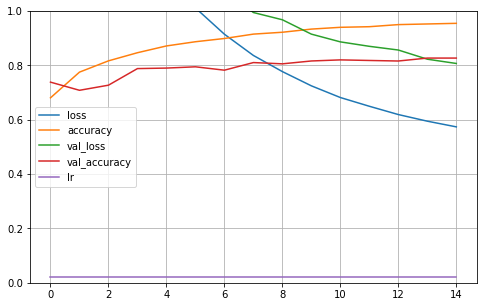

In [39]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

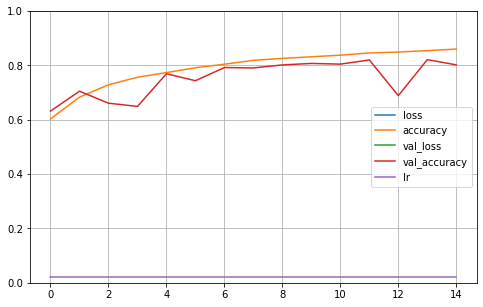

In [40]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

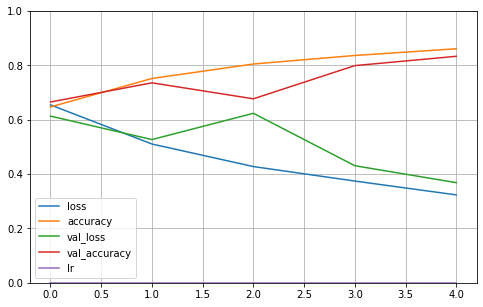

In [41]:
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

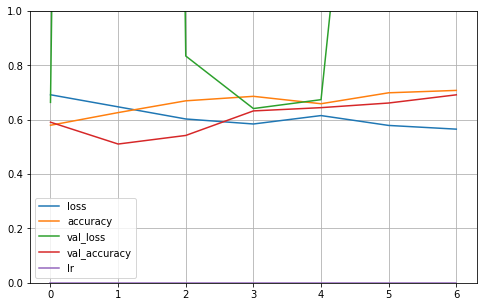

In [42]:
pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [73]:
np.savetxt('pred1.csv', predictions1, delimiter=',')

In [74]:
np.savetxt('pred2.csv', predictions2, delimiter=',')
np.savetxt('pred3.csv', predictions3, delimiter=',')
np.savetxt('pred4.csv', predictions4, delimiter=',')